### Task 6- Create a decision tree classifier and visualise it graphically

**"" Iris Data Prediction using Decision Tree Algorithm ""**

> Task - The Purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly


Building Classification Decision Tree Model and Visualizing Decision Tree using graphviz library


In [ ]:
#Importing multiple library to read,analysed and visualized the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Reading the Iris.csv file 

os.chdir('/content/drive/My Drive/Notebooks/')
df = pd.read_csv("../Data/iris_data.csv")

**Some Basic Information of Data set**

In [ ]:
#Checking top 10 records of Dataset..
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Basic Information regarding data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Describe function gives the basic numerical info about data for each numeric feature..

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Data points count value for each class labels..

df.iris.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: iris, dtype: int64


As we saw that each classes has equal number of data points then our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.



## **Visualizing Iris Data**

> For Visualizing the dataset we used Matplotlib or seaborn as a python library. Their are many plots like scatter, hist, bar, count etc. to visualized the data for better understanding...




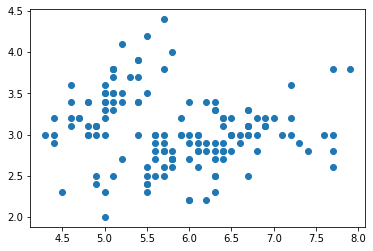

In [ ]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(df['sepal_length'],df['sepal_width'])
plt.show()

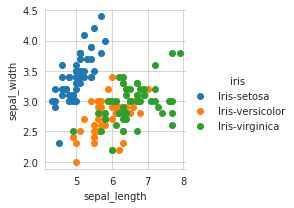

In [ ]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'iris') \
   .map(plt.scatter, 'sepal_length','sepal_width') \
   .add_legend()

plt.show()

Looking at the Scatter plot we can say that all bluepoints(Iris-setosa) are separated perfectly as compare to orange(versicolor) or green(virginica) points for features(sepal_length, sepal_width)

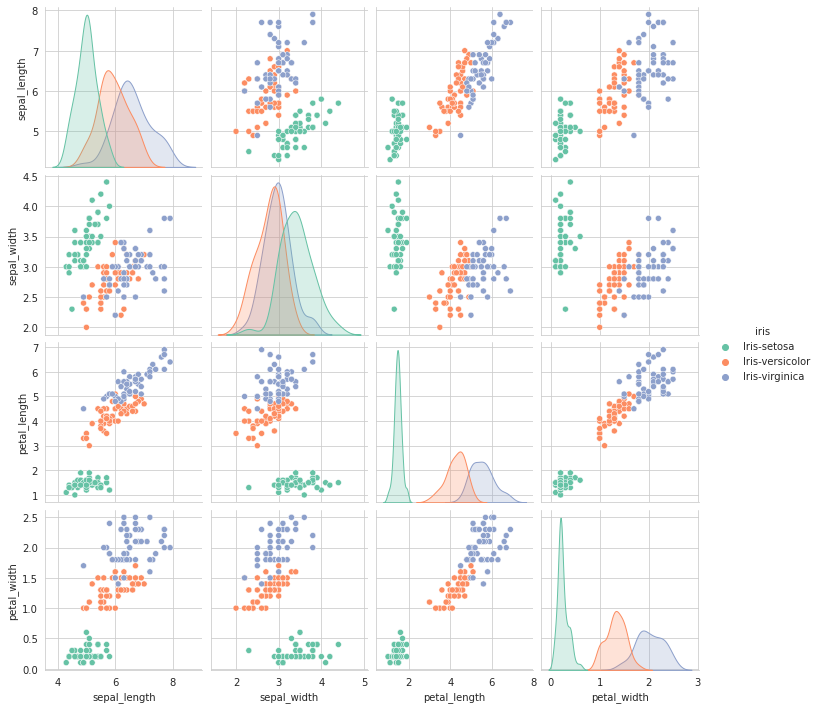

In [ ]:
#Pair plot gives the relationship b/w all features distribution with each other..
sns.pairplot(data=df,hue="iris",palette="Set2")
plt.show()

Look at the result of pair plot we are sure that all blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.

In pair plot we saw that their are some feature combination which has very less overlapping b/w Versicolor and verginica, that's means those feature are very important for our classification task purpose.

Exploring Some New Features
Here I just try to find some new feature with the help of exisiting features.

-Taking difference of each feature with each other to get some more information and visualized it by using plots.

In [ ]:
#Just trying to explore some new feature using the given data...

df['Sepal_diff'] = df['sepal_length']-df['sepal_width']
df['petal_diff'] = df['petal_length']-df['petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,iris,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,0.0,0.0,1.6,-1.6
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,0.0,0.0,1.9,-1.9
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,0.0,0.0,1.5,-1.5
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,0.0,0.0,1.5,-1.5
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,0.0,0.0,1.4,-1.4
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,0.0,0.0,3.7,-3.7
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,0.0,0.0,3.8,-3.8
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,0.0,0.0,3.5,-3.5
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.0,0.0,2.8,-2.8


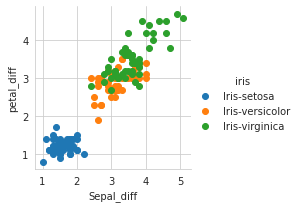

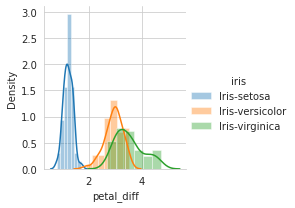

In [ ]:
#Analysed new feature to get some more infomation apart form existing ones...

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='iris')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(df,hue='iris')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show()

In [ ]:
df['Sepal_petal_len_diff'] = df['sepal_length']-df['petal_length']
df['Sepal_petal_width_diff'] = df['sepal_width']-df['petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,iris,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,1.6,-1.6
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,1.9,-1.9
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,1.5,-1.5
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,1.5,-1.5
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,1.4,-1.4
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,3.7,-3.7
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,3.8,-3.8
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,3.5,-3.5
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,2.8,-2.8


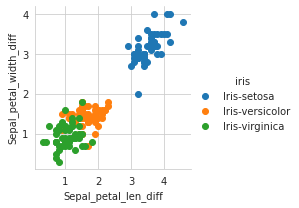

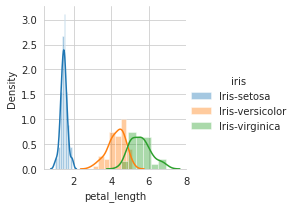

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='iris')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='iris')\
   .map(sns.distplot,'petal_length')\
   .add_legend()
plt.show()

In [ ]:
df['Sepal_petal_len_wid_diff'] = df['sepal_length']-df['petal_width']
df['Sepal_petal_wid_len_diff'] = df['sepal_width']-df['petal_length']
df

,sepal_length,sepal_width,petal_length,petal_width,iris,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


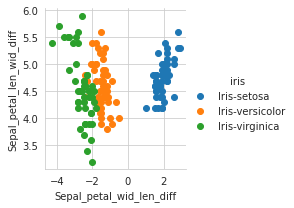

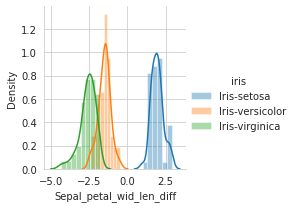

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='iris')\
   .map(plt.scatter,'Sepal_petal_wid_len_diff','Sepal_petal_len_wid_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='iris')\
   .map(sns.distplot,'Sepal_petal_wid_len_diff')\
   .add_legend()
plt.show()


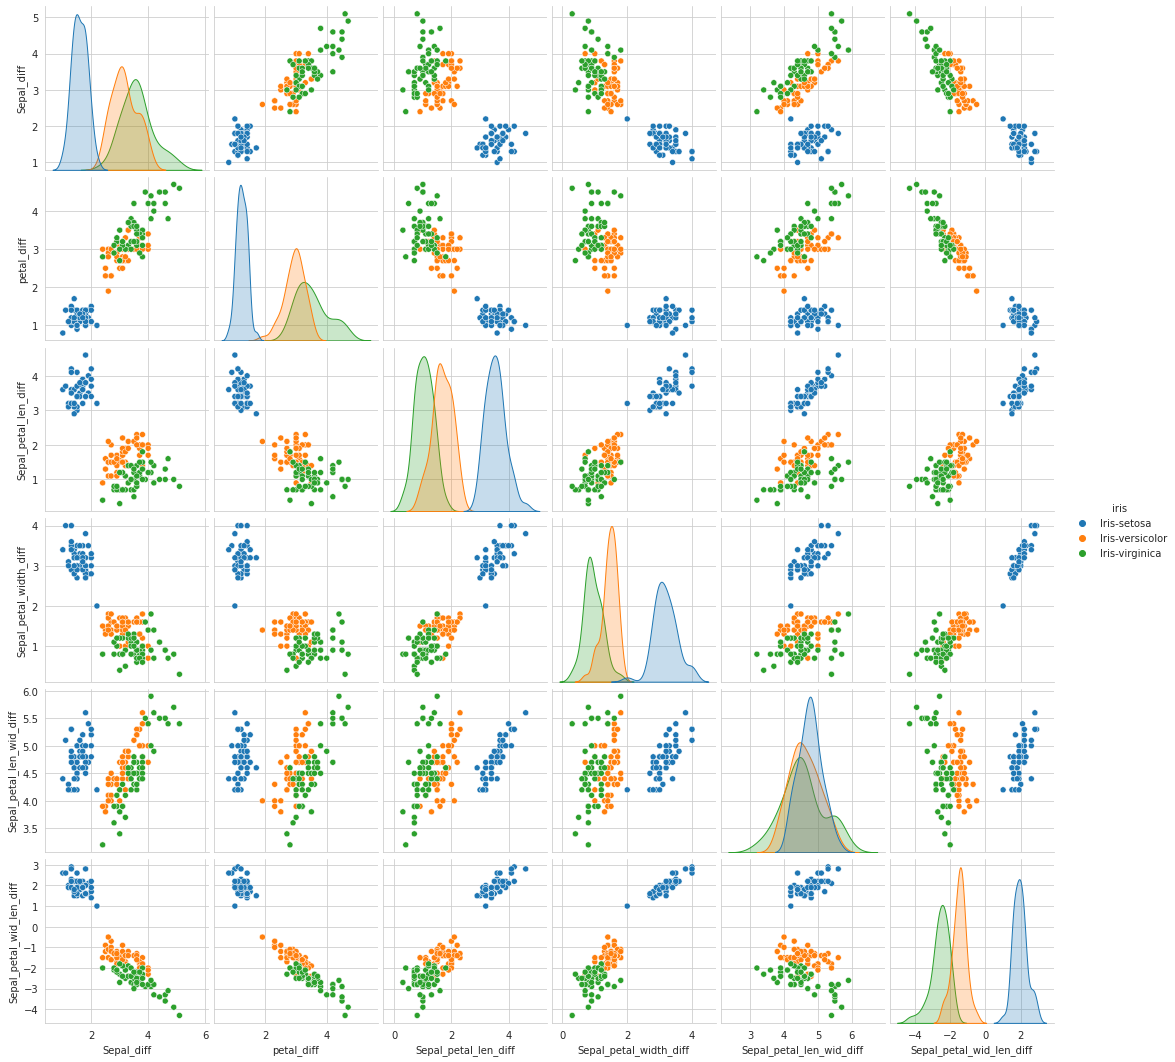

In [ ]:
# Finding relationship b/w new feature based on class labels...

sns.pairplot(df[['iris', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='iris')
plt.show()

With help of Pair plot we are getting some new information but it is more likely similar with our main data features as we saw earlier.
Every combination well separate the Iris-setosa but has some overlapped b/w Versicolor and virginica.

Checking distribution plot for each feature in dataset for each class label.

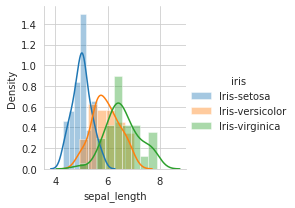

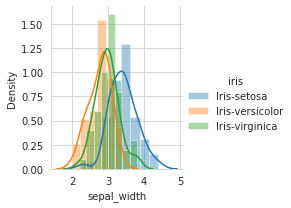

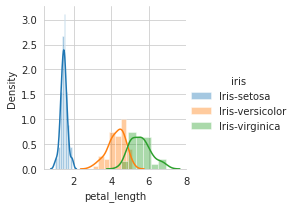

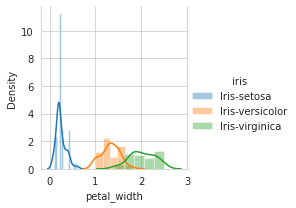

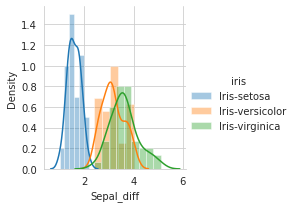

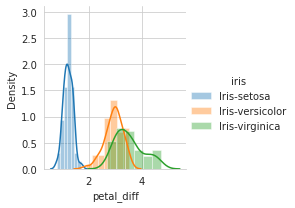

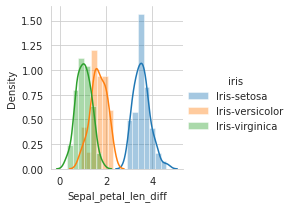

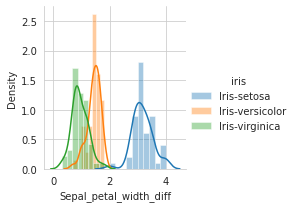

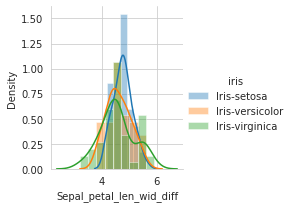

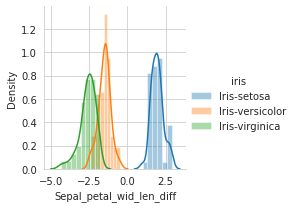

In [ ]:
#exploring distribution plot for all features

for i in df.columns:
    if i == 'iris':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(df,hue='iris')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

## Method 1- Building Classification Model

[Text(152.1818181818182, 199.32, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(121.74545454545455, 163.07999999999998, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(182.61818181818182, 163.07999999999998, 'X[4] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(121.74545454545455, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(91.30909090909091, 90.6, 'X[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(60.872727272727275, 54.359999999999985, 'X[5] <= 0.9\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(30.436363636363637, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(91.30909090909091, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(121.74545454545455, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(152.1818181818182, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(243.4909090909091,

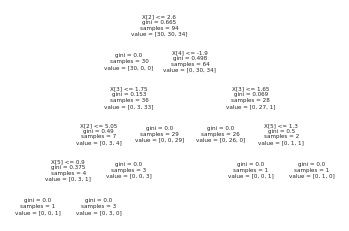

In [ ]:
#Now try to create a model to solve our task
#As per our analysis, we can't find much information from new feature which can helpful in solving our problem...
#For solving our task I have selected few features amongs all to build up our best model..

'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = df[['sepal_length', 'sepal_width','petal_length', \
            'petal_width','Sepal_petal_wid_len_diff',\
        'Sepal_petal_width_diff']]
y = df['iris']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

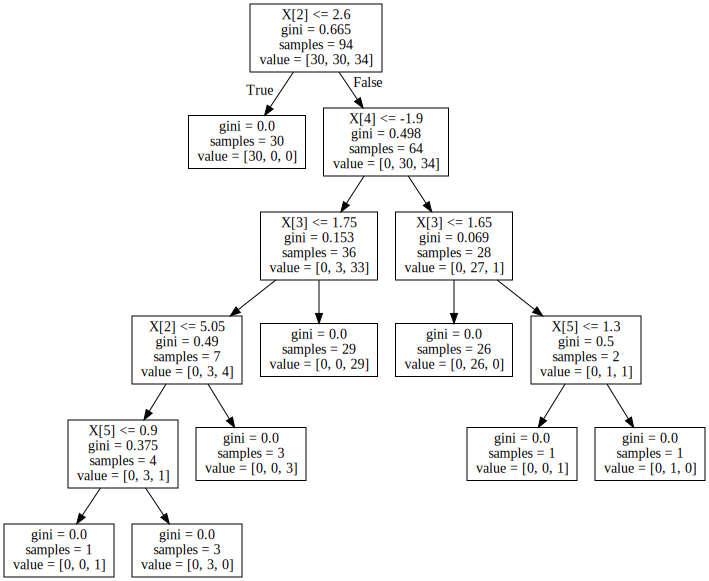

In [ ]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9254032258064516


In [ ]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.9090909090909091


array([[[10,  0],
        [ 0,  1]],

       [[ 4,  0],
        [ 1,  6]],

       [[ 7,  1],
        [ 0,  3]]])

In [ ]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]])

As we know our selected feature are working well and model gives very good accuracy score on validate or actual test data. So Now we can trained our model on Actual train dataset with selected features for evaluating/ deploying our model in real world cases.

[Text(133.92000000000002, 203.85, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(100.44000000000001, 176.67000000000002, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.40000000000003, 176.67000000000002, 'X[4] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(100.44000000000001, 149.49, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(66.96000000000001, 122.31, 'X[4] <= -2.6\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(33.480000000000004, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(100.44000000000001, 95.13, 'X[5] <= 0.9\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(66.96000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 67.94999999999999, 'X[5] <= 1.2\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(100.44000000000001, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(167.40000000000003, 40.770000

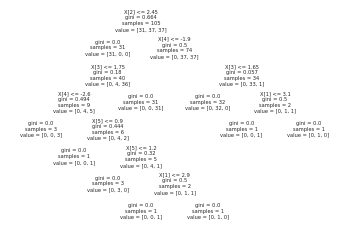

In [ ]:
'''Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

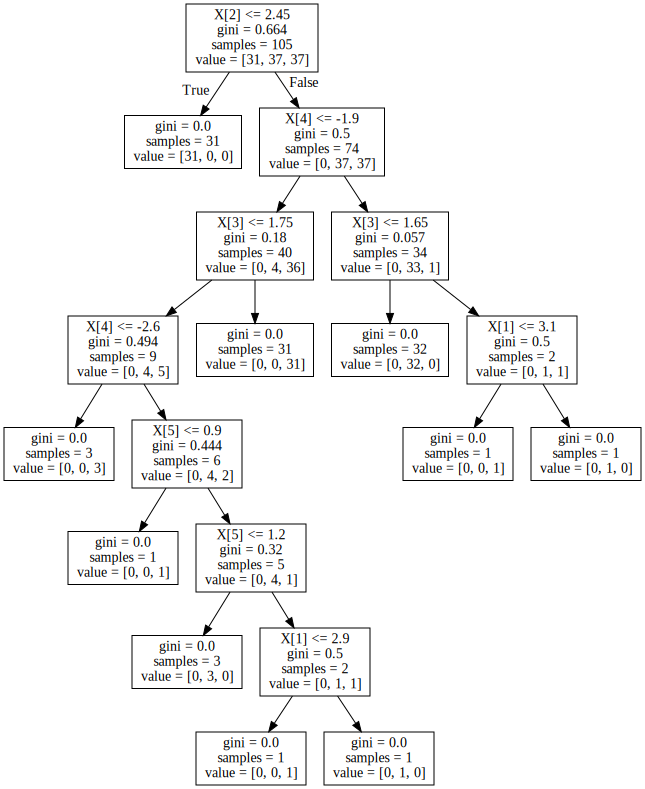

In [ ]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Checking the performance of model on Actual Test data...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 93.33333333333333 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 3, 10]],

       [[29,  3],
        [ 0, 13]]])

In [ ]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


### Method 2 -Using Decision tree Classifier 

In [60]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Now let us define the Decision Tree Algorithm

In [61]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


Let us visualize the Decision Tree to understand it better.

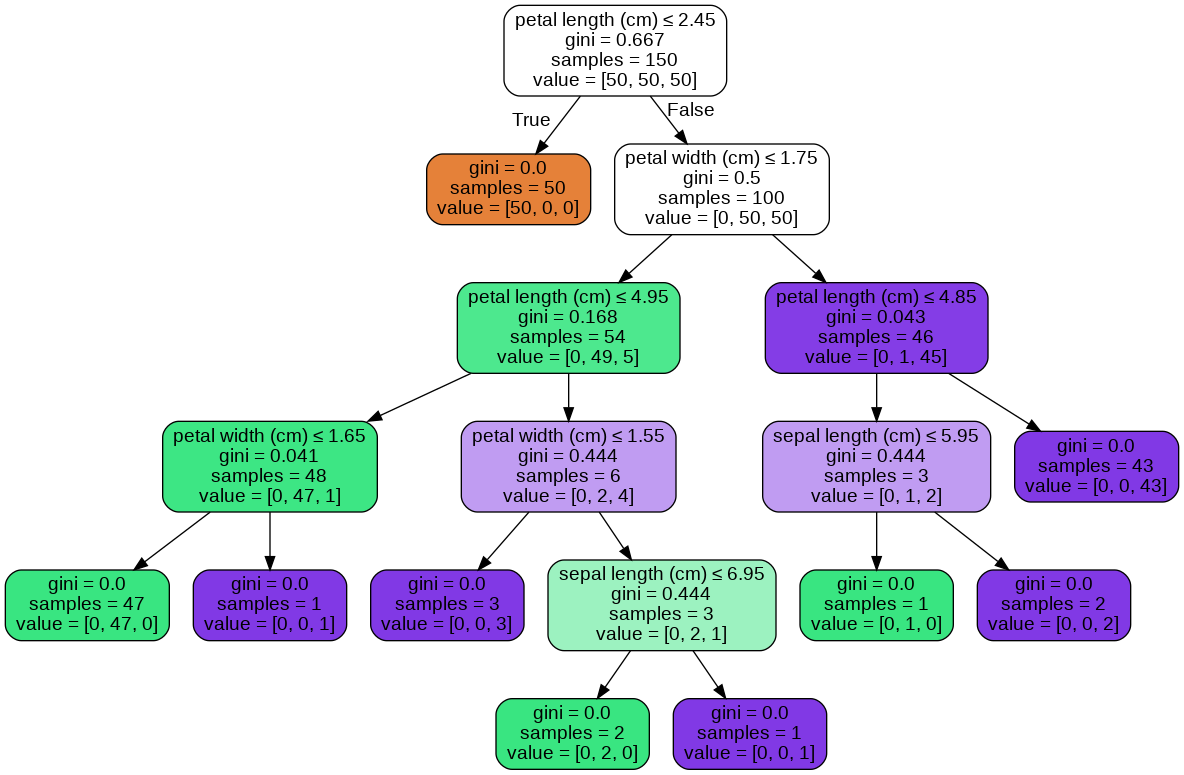

In [62]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ask — We have given sample Iris dataset of flowers with 3 category to train our Algorithm/classifier and the Purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable. And Id column is like serial number for each data points. All Independent features has not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica).

As we saw that each classes (Species) has equal number of data points, So our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.

For Visualizing the dataset we used Matplotlib or seaborn as a python library. Their are many plots like scatter, hist, bar, count etc. to visualized the data for better understanding…

Here I just try to find some new feature with the help of existing features. Taking difference of each feature with each other to get some more information and visualized it by using plots.

Building Classification Decision Tree Model and Visualizing Decision Tree using graphviz library.